In [1]:
# Import necessary librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input

In [2]:
# Load the Airline Passenger Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data)

Dataset Preview:


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
# Parse the data to set 'Month' as a datetime index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
# Display the first few rows of the dataset
print("Dataset Preview (New format):")
display(data)

Dataset Preview (New format):


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


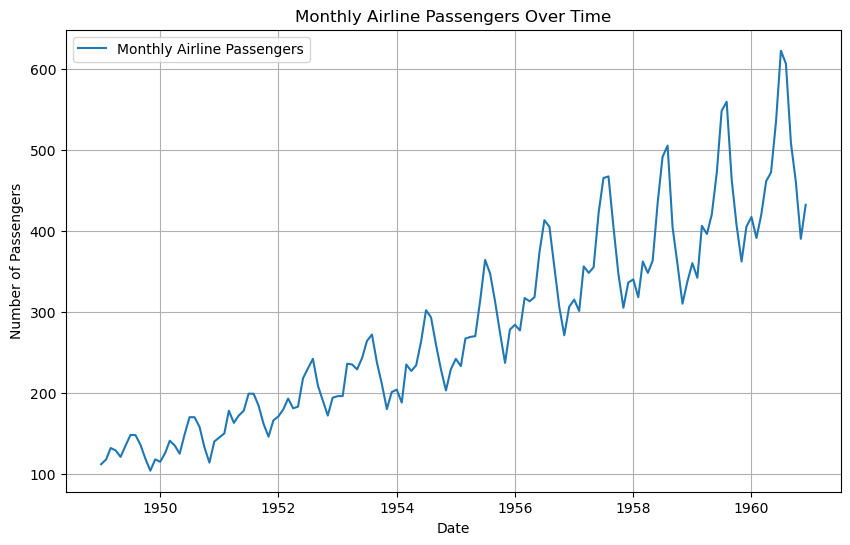

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Monthly Airline Passengers')
plt.title('Monthly Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Normalize the data directly
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data[['Passengers']])  # Normalize directly in the DataFrame

In [13]:
display(data['Passengers'])
# Create lagged features for time series modeling
def create_lagged_features(data, column, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[column][i-lag:i].values)
        y.append(data[column][i])
    return np.array(X), np.array(y)

lag = 3
X, y = create_lagged_features(data, 'Passengers', lag)
display(X)
display(y)

Month
1949-01-01    0.015444
1949-02-01    0.027027
1949-03-01    0.054054
1949-04-01    0.048263
1949-05-01    0.032819
                ...   
1960-08-01    0.969112
1960-09-01    0.779923
1960-10-01    0.689189
1960-11-01    0.552124
1960-12-01    0.633205
Name: Passengers, Length: 144, dtype: float64

array([[0.01544402, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984556],
       [0.03281853, 0.05984556, 0.08494208],
       [0.05984556, 0.08494208, 0.08494208],
       [0.08494208, 0.08494208, 0.06177606],
       [0.08494208, 0.06177606, 0.02895753],
       [0.06177606, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703],
       [0.        , 0.02702703, 0.02123552],
       [0.02702703, 0.02123552, 0.04247104],
       [0.02123552, 0.04247104, 0.07142857],
       [0.04247104, 0.07142857, 0.05984556],
       [0.07142857, 0.05984556, 0.04054054],
       [0.05984556, 0.04054054, 0.08687259],
       [0.04054054, 0.08687259, 0.12741313],
       [0.08687259, 0.12741313, 0.12741313],
       [0.12741313, 0.12741313, 0.1042471 ],
       [0.12741313, 0.1042471 , 0.05598456],
       [0.1042471 , 0.05598456, 0.01930502],
       [0.05598456, 0.01930502, 0.06949807],
       [0.

array([0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208,
       0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552,
       0.04247104, 0.07142857, 0.05984556, 0.04054054, 0.08687259,
       0.12741313, 0.12741313, 0.1042471 , 0.05598456, 0.01930502,
       0.06949807, 0.07915058, 0.08880309, 0.14285714, 0.11389961,
       0.13127413, 0.14285714, 0.18339768, 0.18339768, 0.15444015,
       0.11196911, 0.08108108, 0.11969112, 0.12934363, 0.14671815,
       0.17181467, 0.14864865, 0.15250965, 0.22007722, 0.24324324,
       0.26640927, 0.2027027 , 0.16795367, 0.13127413, 0.17374517,
       0.17760618, 0.17760618, 0.25482625, 0.25289575, 0.24131274,
       0.26833977, 0.30888031, 0.32432432, 0.25675676, 0.20656371,
       0.14671815, 0.18725869, 0.19305019, 0.16216216, 0.25289575,
       0.23745174, 0.25096525, 0.30888031, 0.38223938, 0.36486486,
       0.2992278 , 0.24131274, 0.19111969, 0.24131274, 0.26640927,
       0.24903475, 0.31467181, 0.31853282, 0.32046332, 0.40733

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the MLP model using Keras
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=lag))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

In [ ]:
# Predict and inverse transform the results
y_test_pred = scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0946 - mean_absolute_error: 0.2504
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0618 - mean_absolute_error: 0.1922
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0381 - mean_absolute_error: 0.1447
Epoch 4/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0224 - mean_absolute_error: 0.1089
Epoch 5/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0150 - mean_absolute_error: 0.0922
Epoch 6/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0126 - mean_absolute_error: 0.0874
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0117 - mean_absolute_error: 0.0872
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_absolute_error: 0.0877
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_absolute_error: 0.0855
Epoch 10/50
7/7 [====================

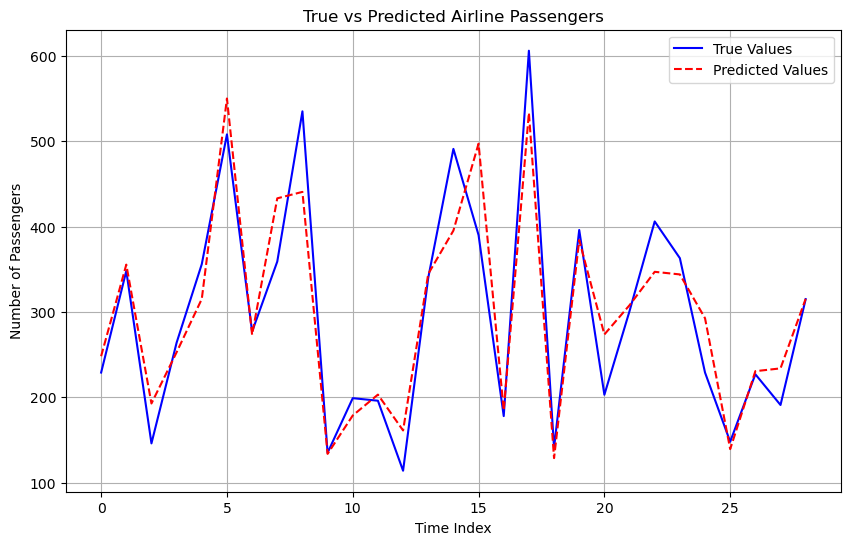

In [7]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_test_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('True vs Predicted Airline Passengers')
plt.xlabel('Time Index')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show() 